Do the following exercise.

1) Clone https://github.com/adamnguyenitvn/bigdata_labs_2019

2) Open sales.ipynb

3) Make a copy of sales.ipynb, name it with your student ID

4) Do the exercise

5) Write your github username here http://socrates.io/#KFCbqAn  . We will add you to the repos for push permission

6) Check your email for github invitation

7) Push your Jupyter notebook to github

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import re

#### Import the data and get a high-level picture

In [2]:
df = pd.read_csv('sales.csv')
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,3,$10.50
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,1,$3.50
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,$2.50,2,$5.00
3,10001,NaN,2018-01-01 12:14:54,$1.50,1,$1.50
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,$3.50,1,$3.50


In [3]:
df.shape

(29922, 6)

In [4]:
df.dtypes

order_id       int64
name          object
ordered_at    object
price         object
quantity       int64
line_total    object
dtype: object

#### TODO: Fix column datatypes

Change ordered_at to datetime

Change price and line_total to float

In [5]:
df['ordered_at'] = pd.to_datetime(df['ordered_at'])

In [6]:
df['line_total'] = pd.to_numeric(df['line_total'].map(lambda x: x.lstrip('$')))
df['price'] = pd.to_numeric(df['price'].map(lambda x: x.lstrip('$')))

In [7]:
df.dtypes

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                float64
quantity               int64
line_total           float64
dtype: object

#### TODO: drop if duplicated or null

In [8]:
df[df.duplicated()].shape[0]

538

In [9]:
df = df.drop_duplicates()

In [10]:
df.isnull().sum()

order_id         0
name          1481
ordered_at       0
price            0
quantity         0
line_total       0
dtype: int64

In [11]:
df[df['name'].isnull()].head()

,order_id,name,ordered_at,price,quantity,line_total
3,10001,NaN,2018-01-01 12:14:54,1.5,1,1.5
6,10002,NaN,2018-01-01 12:23:09,3.0,3,9.0
27,10007,NaN,2018-01-01 15:03:17,2.5,1,2.5
77,10026,NaN,2018-01-02 03:25:40,0.5,2,1.0
88,10031,NaN,2018-01-02 05:45:48,3.5,3,10.5


In [12]:
df = df.dropna()

#### Sanity check for value ranges and to check assumptions

In [13]:
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]

28

In [14]:
df[df['line_total'] < 0].shape[0]

279

# TODO: 
Set line_total = price * quantity if different
Remove if line total < 0

In [15]:
df.loc[(df['price'] * df['quantity']) != df['line_total'], 'line_total'] = df['price'] * df['quantity']
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]

0

In [16]:
df.drop(df[df.line_total < 0].index, inplace=True)
df[df['line_total'] < 0].shape[0]

0

In [17]:
df.describe()

,order_id,price,quantity,line_total
count,27624.000000,27624.000000,27624.000000,27624.000000
mean,14993.783051,2.511711,2.000724,5.028743
std,2888.516649,1.059244,0.819432,3.085410
min,10000.000000,0.500000,1.000000,0.500000
25%,12501.750000,1.500000,1.000000,2.500000
50%,14973.000000,2.500000,2.000000,4.500000
75%,17507.000000,3.500000,3.000000,7.500000
max,19999.000000,4.000000,3.000000,12.000000


#### TODO: Get value between "" in name and put it in category column

In [18]:
df['category'] = [x.split("\"")[1] for x in df['name']]
df['name'] = [x.split("\"")[2] for x in df['name']]

In [19]:
df.head()

,order_id,name,ordered_at,price,quantity,line_total,category
0,10000,Peanut Fudge,2018-01-01 11:30:00,3.5,3,10.5,ICE CREAM
1,10000,Peanut Fudge,2018-01-01 11:30:00,3.5,1,3.5,ICE CREAM
2,10001,Raspberry,2018-01-01 12:14:54,2.5,2,5.0,SORBET
4,10001,Dipped Waffle Cone,2018-01-01 12:14:54,3.5,1,3.5,CONE
5,10002,Lychee,2018-01-01 12:23:09,3.0,1,3.0,SORBET


#### Analysis, finally!

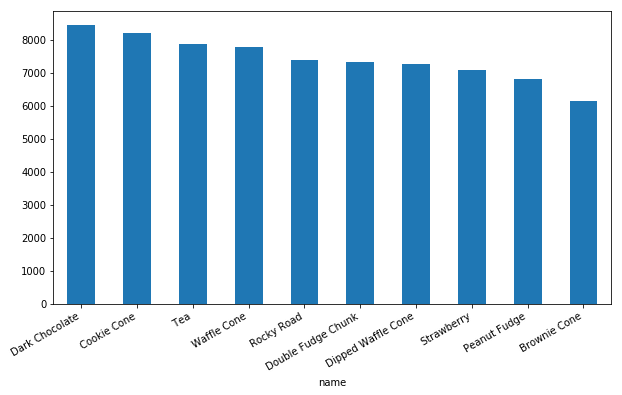

In [20]:
f, ax = plt.subplots(figsize=(10, 6))
df.groupby('name')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()